API -Application Programming Interface

In [4]:
from google.colab import files
files.upload()  # This will prompt you to upload the file
#issa koi bhe file local machine mai hai toh usssa laa skta hai

{}

In [1]:
!pip install kaggle

Uploading your kaggle.json

In [3]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle  #yeh ek directory bnayega ki -p dekhega ki koi directory nhi bnai hai aur ~/.kaggle ek directory bnayge
!cp kaggle.json ~/.kaggle/   #kaggle .json file hai usko .kaggle directory mai bhejega
!chmod 600 ~/.kaggle/kaggle.json   #600 means ki read and write access milega

cp: target 'bhejega' is not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
#API to fetch
!kaggle datasets download akshaydattatraykhare/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.5MB/s]


In [6]:
#extracting the zip file
from zipfile import ZipFile
dataset ='/content/diabetes-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the dataset extracted")


the dataset extracted


Methods to handle MIssing Value
1. Imputation- Mean Imputation: Replace Missing Values with average mean-Best for numerical data (works well when data is normally distributed).
import pandas as pd

--df = pd.DataFrame({'Age': [25, 30, None, 35, 40]})
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill missing with meaninplace=True)  # Fill missing with mean
Median Imputation:Good for skewed numerical data
df['Age'].fillna(df['Age'].median(), inplace=True)

Mode Imputation:Best for categorical data (e.g., Male/Female, Yes/No).
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


2. Dropping-If missing values are too many or imputation is not effective, we drop the missing values.

In [7]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
dataset_diabetes=pd.read_csv('/content/diabetes.csv')

In [9]:
print(dataset_diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [10]:
dataset_diabetes.shape

(768, 9)

In [11]:
dataset_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
dataset_diabetes.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
dataset_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Central Tendencies:
1. Mean
2. Median
3. mode

<ipython-input-16-abac0ad65049>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_diabetes)


<Axes: ylabel='Density'>

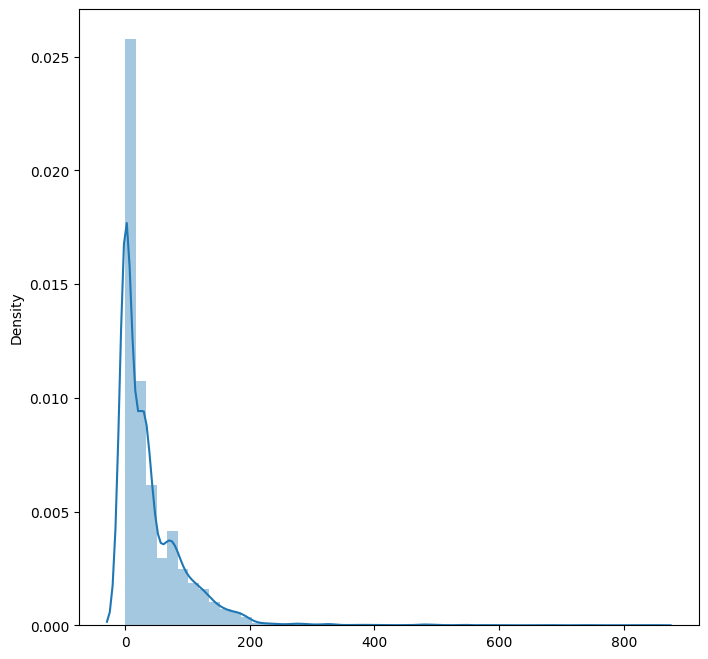

In [16]:
#analyze the distribution of data in the salary
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,8))
sns.distplot(dataset_diabetes)

In [18]:
#I have no dataset with missing Value
# dataset['salary'].fillna(dataset['salary'].median(),inplace=True)
# dataset.isnull().sum()
#filling with MEan Value
#dataset['salary'].fillna(dataset['salary'].mean(),inplace=True)
#dataset['salary'].fillna(dataset['salary'].mode(),inplace=True)
#Dropping MEthod
# diabetes_dataset= diabetes_dataset.dropna(how='any')#dropna(how='any') removes all rows that contain at least one missing (NaN) value.
# dataset.isnull().sum()

Data Standardization
The process of standardizing the data to a common format and comman range


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler # joh standard scaler function hai voh feature scaling karka data ko normalize kar deta hai(mtlb koi dta hai usko ek range mai lai aayega agr bada dur hai jaisa 10,200 or 30,400 bohot difference hai) mean and median mai mtlb 0 or 1 mai
from sklearn.model_selection import train_test_split # yeh data ko training and testing part mai dal dega


In [11]:
#loading the datasets
dataset=load_breast_cancer()

In [12]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [13]:
x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# dataset.data contains feature values (X).
# dataset.feature_names contains column names.

# Display first 5 rows
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
X=x
Y=dataset.target

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

splitting the data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
print(X_train,Y_train,X_test,Y_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     mean compactness  mean concavity  mean concave points  mea

Standardize the data

In [21]:
print(dataset.data.std())

228.29740508276657


In [22]:
scalar=StandardScaler()

In [23]:
scalar.fit(X_train)

StandardScaler()

In [25]:
X_train_standardized= scalar.transform(X_train)

In [26]:
print(X_train_standardized)

[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]


In [27]:

X_test_standardized = scalar.transform(X_test)

In [29]:

print(X_train_standardized.std())
print(X_test_standardized.std())

1.0
0.9684571474192553


In [ ]:
!git config --global user.email "parthbhardwaj2579@gmail.com"
!git config --global user.name "YourGitHubUsername"

# Clone your repo (replace with your repo link)
!git clone https://github.com/YourGitHubUsername/YourRepoName.git
